The dataset originates from the book "Practical Statistics for Data Scientists" by Peter Bruce, Andrew Bruce, and Peter Gedeck.

Context:

A company selling a high-value service wants to determine which of two web presentations is more effective at selling. Due to the high value and infrequent nature of the sales, as well as the lengthy sales cycle, it would take too long to accumulate enough sales data to identify the superior presentation. Therefore, the company uses a proxy variable to measure effectiveness.

A proxy variable stands in for the true variable of interest, which may be unavailable, too costly, or too time-consuming to measure directly. In this case, the proxy variable is the amount of time users spend on a detailed interior page that describes the service.

Content:

The dataset includes a total of 36 sessions across the two web presentations: 21 sessions for page A and 15 sessions for page B. The goal is to determine if users spend more time on page B compared to page A. If users spend more time on page B, it would suggest that page B is more effective at engaging potential customers, and therefore, does a better selling job.

The time is expressed in hundredths of seconds. For example, a value of 0.1 indicates 10 seconds, and a value of 2.53 indicates 253 seconds.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('web_page_data.csv')
df.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [4]:
df['Time'] = (df['Time'] * 100).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Page    36 non-null     object
 1   Time    36 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 564.0+ bytes


<Axes: xlabel='Page', ylabel='count'>

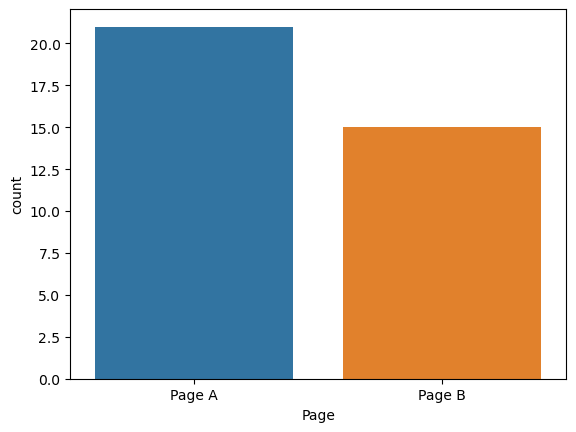

In [5]:
dfa = df[df['Page'] == 'Page A']['Time']
dfb = df[df['Page'] == 'Page B']['Time']
sns.countplot(df, x=df['Page'])

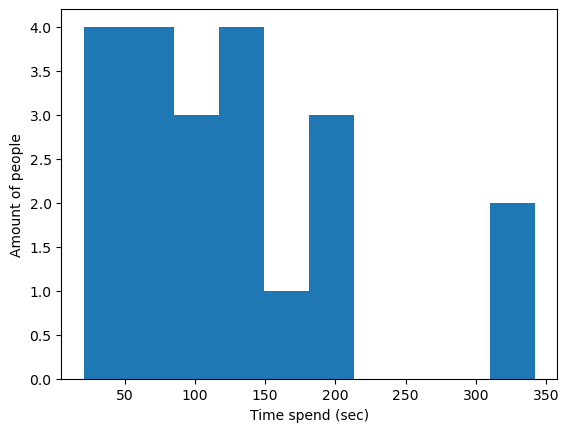

In [6]:
fig, ax = plt.subplots()
ax.hist(dfa, 10)
plt.xlabel('Time spend (sec)')
plt.ylabel('Amount of people')
plt.show()

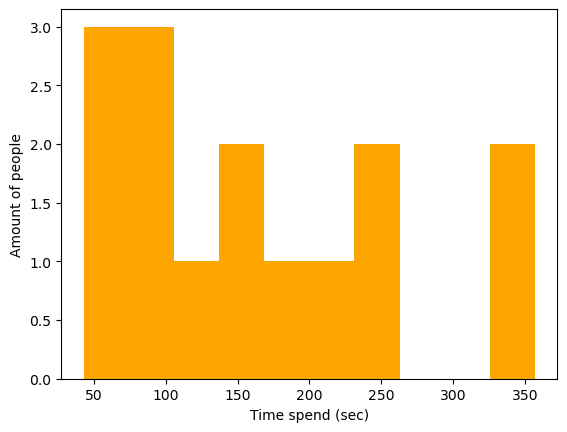

In [7]:
fig, ax = plt.subplots()
ax.hist(dfb, 10, color='orange')
plt.xlabel('Time spend (sec)')
plt.ylabel('Amount of people')
plt.show()

In [8]:
print(dfa.mean(), dfb.mean())

126.33333333333333 161.93333333333334


<h3> Start of A/B testing</h3>
alpha = 0.5
Let's check the normality of distibutions

In [10]:
from scipy.stats import shapiro

_, pval = shapiro(dfa)
print(pval)

_, pval = shapiro(dfb)
print(pval)

0.01751495711505413
0.16062036156654358


Group's B p-value is higher, than alpha level, so the distibution of group B is not normal, so we will use non-parametric mannwhithey U-test

In [12]:
from scipy.stats import mannwhitneyu
_, pval = mannwhitneyu(dfa, dfb)
print('p-value =', pval)

p-value = 0.22880908661199295


<h3> Results </h3>
The p-value is higher than our alpha level, so we decline the equality hypothesis

<h4>The test shows, that people statistically spend more time on page B</h4>